<a href="https://colab.research.google.com/github/Washington055/Projects/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importar librerias 
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#subir archivos
from google.colab import files
df = files.upload()


Saving pacientes.csv to pacientes.csv


In [3]:
pacientes = pd.read_csv("pacientes.csv")

In [4]:
pacientes.head()

,edad,colesterol,problema_cardiaco
0,63,233,1
1,37,250,1
2,41,204,1
3,56,236,1
4,57,354,1


In [5]:
pacientes.isnull().sum()

edad                 0
colesterol           0
problema_cardiaco    0
dtype: int64

In [6]:
#categorizando entre saludable y no saludable
saludables = pacientes[pacientes["problema_cardiaco"]==0]
cardiacos = pacientes[pacientes["problema_cardiaco"]==1]


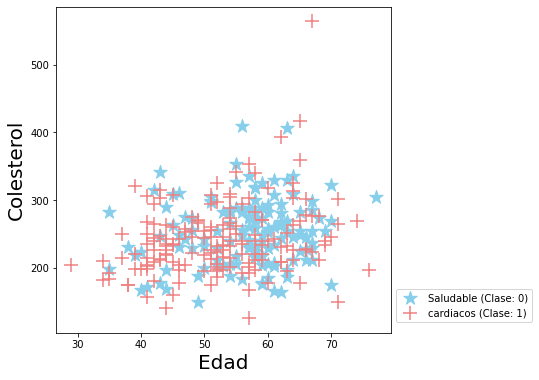

In [7]:
plt.figure(figsize=(6,6))
plt.xlabel("Edad",fontsize=20)
plt.ylabel("Colesterol",fontsize=20)
plt.scatter(saludables["edad"],saludables["colesterol"],
            label="Saludable (Clase: 0)", marker="*", c="skyblue", s=200)
plt.scatter(cardiacos["edad"],cardiacos["colesterol"],
            label="cardiacos (Clase: 1)", marker="+", c="lightcoral", s=200) 
plt.legend(bbox_to_anchor=(1,0.15))
plt.show()           
            

In [8]:
from scipy.stats import entropy


In [9]:
edades=pd.Series([40,30,20,50])
colesterol = pd.Series([100,110,100,110])

In [10]:
print(edades.value_counts()/edades.size)
print(colesterol.value_counts()/colesterol.size)
print(entropy(edades.value_counts()/edades.size, base=2))
print(entropy(colesterol.value_counts()/colesterol.size, base=2))

40    0.25
30    0.25
20    0.25
50    0.25
dtype: float64
100    0.5
110    0.5
dtype: float64
2.0
1.0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#separar los datos para el entranamiento y testeo
datos_entrena, datos_prueba, clase_entrena, clase_prueba = train_test_split(
    pacientes[["edad", "colesterol"]],
    pacientes["problema_cardiaco"],test_size=0.30
)

In [13]:
from sklearn import tree

0.5444444444444444
|--- edad <= 54.50
|   |--- colesterol <= 273.50
|   |   |--- colesterol <= 264.50
|   |   |   |--- edad <= 47.50
|   |   |   |   |--- colesterol <= 262.00
|   |   |   |   |   |--- edad <= 44.50
|   |   |   |   |   |   |--- colesterol <= 198.50
|   |   |   |   |   |   |   |--- colesterol <= 162.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- colesterol >  162.00
|   |   |   |   |   |   |   |   |--- edad <= 42.50
|   |   |   |   |   |   |   |   |   |--- colesterol <= 171.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- colesterol >  171.00
|   |   |   |   |   |   |   |   |   |   |--- edad <= 36.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- edad >  36.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- edad >  42.50
|   |   |   |   |   |   |   |   |   |--- class: 0

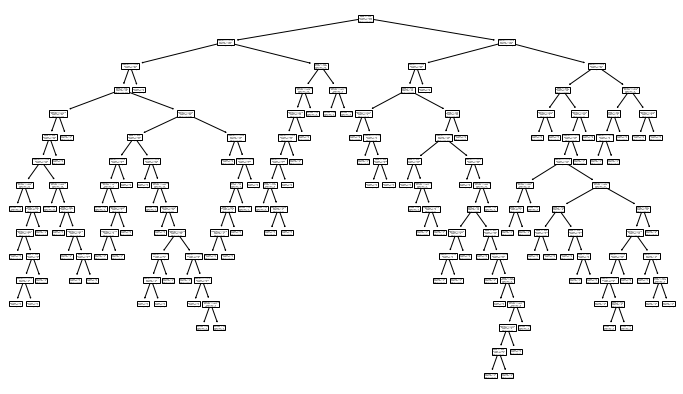

In [14]:
# testeo y grafica del arbol de desicion
arbol_desicion = tree.DecisionTreeClassifier(criterion="entropy")
arbol = arbol_desicion.fit(datos_entrena,clase_entrena)
acurracy = arbol_desicion.score(datos_prueba, clase_prueba)
print(acurracy)
print(tree.export_text(arbol,feature_names=["edad", "colesterol"]))

plt.figure(figsize=(12,7))
tree.plot_tree(arbol,feature_names=["edad", "colesterol"])
plt.show()

##Prediccion


In [22]:
# realizar la prueba del modelo 
print("Nuevo paciente es:", arbol_desicion.predict([[21,300]]))

Nuevo paciente es: [0]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
